# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

#print train_data[:5]


training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
### STUDENT START ###

#For the first num_examples training examples printing the label and text. 
    for i in range(num_examples):
        print "Label: ", newsgroups_train.target_names[train_labels[i]]
        print "Text: \n", train_data[i], "\n"

### STUDENT END ###
P1()

Label:  comp.graphics
Text: 
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

Label:  talk.religion.misc
Text: 


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuri

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():
### STUDENT START ###

    ####Part A
    print "Part A"

    ##Size of the Vocabulary
    #Storing the model, fitting it and printing the number of columns in the vocabulary matrix.
    vectorizer = CountVectorizer(min_df = 1)
    vocabulary = vectorizer.fit_transform(train_data)
    print "The size of the vocabulary is", vocabulary.shape[1], "words."

    ##Avg number of non-zero features
    #vocabulary.nnz gives the number of non zero features in the matrix
    #dividing it by the number of rows gives the avg number of non-zero features per row
    avg_non_zero_features = vocabulary.nnz / vocabulary.shape[0]
    print "The average number of non-zero features per row is", avg_non_zero_features

    ##What fraction of entries in the matrix are non-zero?
    #Total entries in the matrix is rows times columns of the vocabulary matrix
    total_entries = vocabulary.shape[0] * vocabulary.shape[1]
    #Fraction of them that are non zero is the non zero entries found in the previous part divided
    #by the total entries just recorded
    fraction_non_zero = float(vocabulary.nnz) / total_entries
    print "The fraction of non-zero entries in the entire matrix is", round(fraction_non_zero,6)


    ####Part B
    print "\nPart B"
    ###Get a list of the features and print them
    list_of_words = vectorizer.get_feature_names()
    print "The first word in the feature string is",list_of_words[0], "and the last word is", list_of_words[-1]


    ####Part C
    print "\nPart C"
    #Define the new vocabulary
    restricted_vocab = {"atheism":0, "graphics":1, "space":2, "religion":3}
    #Define and fit the model, restricting the vocabulary to the four words
    vectorizer = CountVectorizer(min_df = 1, vocabulary = restricted_vocab)
    vocabulary_restricted = vectorizer.fit_transform(train_data)
    print "The vector has", vocabulary_restricted.shape[0], "rows, matching the original data, and", vocabulary_restricted.shape[1], "columns, one for each of the four words."

    #Divide the number of nonzero values by the number of rows to get the avg per row
    avg_non_zero_features = float(vocabulary_restricted.nnz) / vocabulary_restricted.shape[0]
    print "The average number of non-zero features per row with the restricted vocabulary is", round(avg_non_zero_features, 3)


    ####Part D
    print "\nPart D"
    #Define a bi_tri model with ngram range of 2,3 and fit it to the data
    bi_tri = CountVectorizer(analyzer='word', ngram_range=(2, 3), min_df=1)
    bi_tri_vocab = bi_tri.fit_transform(train_data)
    print "The size of the bigram/trigram vocabulary is", bi_tri_vocab.shape[1], "words."


    ####Part E
    print "\nPart E"
    #Define and fit a model with min_df = 10 to exclude words with <10 occurrences
    pruned_model = CountVectorizer(analyzer = 'word', min_df = 10)
    pruned_fit = pruned_model.fit_transform(train_data)
    #Get the size of the resulting matrix
    vocab_size = pruned_fit.shape
    print "The size of the vocabulary when min_df = 10 is", str(vocab_size[1]) + ",", str(vocabulary.shape[1] - vocab_size[1]), "less than when min_df = 1."


    ####Part F
    print "\nPart F"
    vectorizer = CountVectorizer(min_df = 1)
    vocabulary = vectorizer.fit_transform(train_data)    
    #Get list of words in the training data
    vocabulary_train = vectorizer.fit_transform(train_data)
    list_of_words_train = vectorizer.get_feature_names()
    #And the list of words in the dev data
    vocabulary_dev = vectorizer.fit_transform(dev_data)
    list_of_words_dev = vectorizer.get_feature_names()

    #Define a list for the intersection
    intersection = []
    #Iterate through all the words in the dev data and check if they're in the training data. If so append the word
    #to the intersection list
    for i in range(len(list_of_words_dev)):
        if list_of_words_dev[i] in list_of_words_train:
            intersection.append(list_of_words_dev[i])
    print "There are", len(list_of_words_train), "words in the training data and", len(list_of_words_dev), "words in the dev data."
    print "Of the", len(list_of_words_dev), "words in the dev data", len(list_of_words_dev) - len(intersection), "words are not in the training data."

### STUDENT END ###
P2()

Part A
The size of the vocabulary is 26879 words.
The average number of non-zero features per row is 96
The fraction of non-zero entries in the entire matrix is 0.003598

Part B
The first word in the feature string is 00 and the last word is zyxel

Part C
The vector has 2034 rows, matching the original data, and 4 columns, one for each of the four words.
The average number of non-zero features per row with the restricted vocabulary is 0.268

Part D
The size of the bigram/trigram vocabulary is 510583 words.

Part E
The size of the vocabulary when min_df = 10 is 3064, 23815 less than when min_df = 1.

Part F
There are 26879 words in the training data and 16246 words in the dev data.
Of the 16246 words in the dev data 4027 words are not in the training data.


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [5]:
def P3():
### STUDENT START ###
   
    ###K Nearest Neighbors
    print "K Nearest Neighbors"
    #Vectorizing the training and dev data
    vectorizer = CountVectorizer()
    vectorizer_train_data = vectorizer.fit_transform(train_data)
    vectorizer_dev_data = vectorizer.transform(dev_data)

    #List to store f1 scores for each K value
    k_neighbors_f1 = []
       
    #Fit KNN for k = 1 to k = 100, then get f1 score and append the f1 score to k_neighbors_f1
    for i in range(1,100):
        knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
        knn.fit(vectorizer_train_data, train_labels)
        dev_prediction = knn.predict(vectorizer_dev_data)
        f1_score = metrics.f1_score(dev_labels, dev_prediction, average='weighted')
        k_neighbors_f1.append(f1_score)

    #Print out the index plus 1 of the highest value in the k_neighbors_f1 score 
    print "The optimal value of k between 1 and 100 is", k_neighbors_f1.index(max(k_neighbors_f1)) + 1, "which results in a prediction accuracy of", round(max(k_neighbors_f1),4)

    
    ###Multinomial Naive Bayes
    print("\nMultinomial Naive Bayes")
    #Define a function to search for optimal alpha
    def mnb(alphas):
        #Model to optimize is MultinomialNB
        multinb = MultinomialNB()
        #Set up gridsearch to search across alphas based on accuracy
        grid = GridSearchCV(multinb, alphas, scoring = 'accuracy')
        grid.fit(vectorizer_train_data,train_labels)      
        #Print the best alpha
        print "The best alpha value for Multinomial Naive Bayes is: ", grid.best_params_

    #Alphas to search over
    alphas = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 10.0, 100.0]}
    #Run the function for those alphas
    mnb(alphas)
   
    
    ###Logistic Regression
    print("\nLogistic Regression")
    #Define a function to search for optimal C
    def logit(Cs):
        log_reg = LogisticRegression(penalty = 'l2')
        #Grid search for C
        grid = GridSearchCV(log_reg, Cs)
        grid.fit(vectorizer_train_data, train_labels)
        #And print the best C
        print "The best C value is: ", grid.best_params_

    #C values to search over, searching every tenth between 0 and 10
    c_vals = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 10.0, 100.0]
    Cs = {'C': c_vals}
    #Run the function for the Cs in the list
    logit(Cs)
    
    
    ###Part C: Sum of Squared Weights for Differenct Values of C
    print "\nPart C"

    #Loop through each c value
    for k in c_vals:
        #Define and fit the regression for that C value, setting C equal to a value in the c_vals list
        logit_reg = LogisticRegression(C = k)
        logit_reg.fit(vectorizer_train_data, train_labels)
        #Loop through each class
        for i in range(4):
            #Store the coefficients for each class in weights
            weights = logit_reg.coef_[i]
            #Loop through each value in weights
            for j in range(len(weights)):
                #Square each weight value
                weights[j] = weights[j] ** 2
            print "The sum of the weights for C =", k, "on class", i, "is", round(sum(weights),4)
        print "\n"
    ### STUDENT END ###
P3()

K Nearest Neighbors
The optimal value of k between 1 and 100 is 40 which results in a prediction accuracy of 0.472

Multinomial Naive Bayes
The best alpha value for Multinomial Naive Bayes is:  {'alpha': 0.01}

Logistic Regression
The best C value is:  {'C': 0.2}

Part C
The sum of the weights for C = 1e-05 on class 0 is 0.0003
The sum of the weights for C = 1e-05 on class 1 is 0.0006
The sum of the weights for C = 1e-05 on class 2 is 0.0004
The sum of the weights for C = 1e-05 on class 3 is 0.0003


The sum of the weights for C = 0.0001 on class 0 is 0.0077
The sum of the weights for C = 0.0001 on class 1 is 0.0119
The sum of the weights for C = 0.0001 on class 2 is 0.0094
The sum of the weights for C = 0.0001 on class 3 is 0.0091


The sum of the weights for C = 0.001 on class 0 is 0.1651
The sum of the weights for C = 0.001 on class 1 is 0.201
The sum of the weights for C = 0.001 on class 2 is 0.1807
The sum of the weights for C = 0.001 on class 3 is 0.1872


The sum of the weights 

ANSWER: 

a) There are two things that are true of posts which cause k nearest neighbors to struggle. The first is that there are a lot of different words being used, even among posts in the same category, so each category isn't necessarily very similar internally and individual posts may be similar to those in other classes. The second problem is that there's a lot of words in each post that tell you nothing about what category it should be in (a, the, in, by etc.) which just serve to add a lot of noise. To the model two posts with "the" in them 15 times are as similar as two posts with "Jesus" in them 15 times, even though those two words in reality tell you vastly different amounts of information about the type of post.

b) I would guess that Naive Bayes works better than logistic regression here because there are some words which are correlated with both a single classification and with certain other words. In Naive Bayes both these inputs will be weighted strongly, even if they're correlated with each other, while logistic regression will give them lower weights due to their collinearity. This is fine if both words appear in a document but if only one of the words appears in a document then the higher weight in naive Bayes will result in the document being more likely to be classified properly than the lower weight logistic regression would assign.

c) The C term specifies how sensitive the regression is to outliers in the training data. A lower value for C will allow the regression more flexibility in fitting itself to the random variations in the training data, while a higher value of C will restrict the models ability to fit random variations, particularly when there is a small amount of training data. So C and the sum of squared weights have a positive relationship because the higher C is the more the less variance it is able to account for, which means more variance will go unexplained, increasing the sum of squared weights.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [6]:
def P4():
### STUDENT START ###

    #Throughout the function I use len(newsgroups_train.target_names) instead of 4 to loop through each class
    #to make the function robust to adding classes in the future.

    #Function to get the top 5 weights for each class and graph them
    #It takes the ngram range as inputs
    def top_5_per_class(ngram_low, ngram_high):
        #Vectorizing the data and training a logistic regression model
        vectorizer = CountVectorizer(ngram_range = (ngram_low, ngram_high))
        vectorizer_train_data = vectorizer.fit_transform(train_data)
        vectorizer_dev_data = vectorizer.transform(dev_data)
        log_reg = LogisticRegression()
        log_reg.fit(vectorizer_train_data, train_labels)

        #Empty list for indices of the top weighted features across all classes
        top_index = []

        #For each of the classes get the indices of the top 5 weights. Append them to the top_index
        for i in range(len(newsgroups_train.target_names)):
            #Store the coefficients in weights
            weights = log_reg.coef_[i]
            #Get the top 5 indices
            top_5 = (np.argpartition(weights, -5)[-5:]).tolist()
            top_index = top_index + top_5

        #Weights list to store the feature weights in 
        weights = []
        #For each of the top weighted inputs store the weights for each class in i_weights, 
        #then append that to the weights list.
        for i in top_index:
            i_weights = []
            for j in range(len(newsgroups_train.target_names)):
                i_weights.append(round(log_reg.coef_[j][i],3))
            weights.append(i_weights)

        #Store all the classes in the data in the headers list for the table
        headers = []
        for i in range(len(newsgroups_train.target_names)):
            headers.append(newsgroups_train.target_names[train_labels[i]])

        #Print out the table of the weights
        print "ngram range:", ngram_low, "to", ngram_high
        print tabulate(weights, headers = headers), "\n"

    #Calling the function on ngram = 1 and ngram = 2
    top_5_per_class(1,1)
    top_5_per_class(2,2)
        
### STUDENT END ###
P4()

ngram range: 1 to 1
  comp.graphics    talk.religion.misc    sci.space    alt.atheism
---------------  --------------------  -----------  -------------
          0.94                 -0.41        -0.449         -0.435
          0.954                -0.617       -0.792         -0.065
          0.99                 -0.221       -0.341         -0.464
          1.125                -0.398       -0.42          -0.395
          1.031                -0.097       -0.32          -0.835
          0.144                 0.978       -0.682         -0.487
         -0.359                 1.125       -0.702         -0.378
         -0.758                 1.936       -1.336         -0.763
         -0.335                 1.266       -0.806         -0.627
         -0.583                 1.346       -0.826         -0.468
         -0.355                -0.393        0.92          -0.38
         -0.471                -0.465        0.936         -0.332
         -0.572                -0.48         1.011       

ANSWER: I find it surprising that in most cases the weights on the top bigram features are much lower than the weights on the top single word features. For both graphics and atheism the lowest weighted of the top 5 single word features is weighted more than the most strongly weighted bigram feature. There is some overlap in weights of the top 5 on the religion and space categories but in both cases the top weight and the bottom weight in the single word top 5 are higher than their corresponding weights in the bigram top 5. 

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [7]:
#def empty_preprocessor(s):
#    return s

#def better_preprocessor(s):
### STUDENT START ###

### STUDENT END ###

#def P5():
### STUDENT START ###

### STUDENT END ###
#P5()

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

L1 non zero weights: 1061
L2 non zero weights: 26879
There are 25818 more weighted features in the L2 regression than there are in the L1 regression.


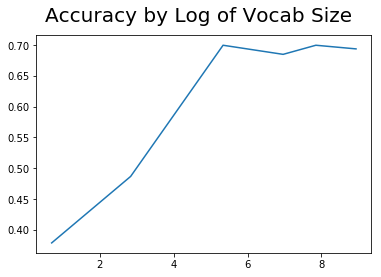

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

        ### STUDENT START ###
    #Learned weights not equal to zero
    #Set up vectorization for both train and dev data
    vectorizer = CountVectorizer()
    vectorizer_train_data = vectorizer.fit_transform(train_data)
    vectorizer_dev_data = vectorizer.transform(dev_data)

    #Define L1 and L2 logistic regression models
    log_l1 = LogisticRegression(penalty = 'l1', tol=.01)
    log_l2 = LogisticRegression(penalty = 'l2', tol=.01)

    #Fit model for L1
    log_l1.fit(vectorizer_train_data, train_labels)
    #Store the weights in a list
    weights = log_l1.coef_
    weight_list = weights.tolist()
    #List to store the indexes of non zero weights
    l1_non_zero_weights = []
    #Iterate across each class and each input, if the input is not equal to zero add 1 store the
    #index in non_zero_weights_index
    for i in range(len(weight_list)):
        for j in range(len(weight_list[0])):
            if weight_list[i][j] != 0:
                l1_non_zero_weights.append(j)
    #We now have a list of all the indices with non zero weights, but there could be duplicates
    #Convert it to a set and then back to a list to remove dupes
    l1_non_zero_weights = list(set(l1_non_zero_weights))

    print "L1 non zero weights:", len(l1_non_zero_weights)

    #Fit model for L2
    log_l2.fit(vectorizer_train_data, train_labels)
    #Store the weights in a list
    weights = log_l2.coef_
    weight_list = weights.tolist()
    #List to store the indexes of non zero weights
    l2_non_zero_weights = []
    #Iterate across each class and each input, if the input is not equal to zero add 1 store the
    #index in non_zero_weights_index
    for i in range(len(weight_list)):
        for j in range(len(weight_list[0])):
            if weight_list[i][j] != 0:
                l2_non_zero_weights.append(j)
    #We now have a list of all the indices with non zero weights, but there could be duplicates
    #Convert it to a set and then back to a list to remove dupes
    l2_non_zero_weights = list(set(l2_non_zero_weights))

    print "L2 non zero weights:", len(l2_non_zero_weights)
    weight_diff = len(l2_non_zero_weights) - len(l1_non_zero_weights)

    print "There are", weight_diff, "more weighted features in the L2 regression than there are in the L1 regression."

    #Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight in L1
    #and retrain a model using "L2".

    c_vals = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    #List to store accuracies and vocab sizes in
    accuracy = []
    vocab_size = []
    #For each c value fit the data, train a log model with a different c, get the weighted indices,
    #make a dictionary with the corresponding words, train an L2 model with those words and append the accuracy of
    #the model to the accuracy list
    for i in c_vals:
        vectorizer = CountVectorizer()
        vectorizer_train_data = vectorizer.fit_transform(train_data)
        vectorizer_dev_data = vectorizer.transform(dev_data)

        #Get the features (not numeric)
        vectorizer_train_features = vectorizer.get_feature_names()

        #Start with L1 regression, vary C
        log_l1 = LogisticRegression(penalty = 'l1', tol=.01, C = i)
        #Fit model for L1
        log_l1.fit(vectorizer_train_data, train_labels)
        #Store the weights in a list
        weights = log_l1.coef_
        weight_list = weights.tolist()
        #List to store the indexes of non zero weights
        l1_non_zero_weights = []
        #Iterate across each class and each input, if the input is not equal to zero add 1 store the
        #index in non_zero_weights_index
        for i in range(len(weight_list)):
            for j in range(len(weight_list[0])):
                if weight_list[i][j] != 0:
                    l1_non_zero_weights.append(j)
        #We now have a list of all the indices with non zero weights, but there could be duplicates
        #Convert it to a set and then back to a list to remove dupes
        l1_non_zero_weights = list(set(l1_non_zero_weights))

        #That value is the number of words in the vocab, append it to the vocab_size list
        vocab_size.append(len(l1_non_zero_weights))

        #Blank dictionary to store L1 words
        l1_words = {}
        j = 0
        #Add each word weighted in L1 to the dictionary
        for i in l1_non_zero_weights:
                l1_words[vectorizer_train_features[i]] = j
                j += 1

        #New vectorizer with only l1_words as vocabulary
        vectorizer_2 = CountVectorizer(vocabulary = l1_words)
        vectorizer_train_data = vectorizer_2.transform(train_data)
        vectorizer_dev_data = vectorizer_2.transform(dev_data)

        #Define an L2 log model and fit it
        log_l2 = LogisticRegression(penalty = 'l2', tol=.01)
        log_l2.fit(vectorizer_train_data, train_labels)

        #Append the regression accuracy to the accuracy list
        accuracy.append(log_l2.score(vectorizer_dev_data, dev_labels))

    #Convert the vocab sizes to log for graphing
    vocab_size_log = np.log(vocab_size)

    #Graph the accuracies as a function of vocab size
    fig = plt.figure()
    plt.plot(vocab_size_log, accuracy)
    fig.suptitle('Accuracy by Log of Vocab Size', fontsize=20)
    plt.show
    


    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [9]:
def P7():
### STUDENT START ###

    #Defin the new vectorizer, and apply it to the training and dev data
    tfid = TfidfVectorizer()
    tfid_train_data = tfid.fit_transform(train_data)
    tfid_dev_data = tfid.transform(dev_data)

    #Set up the logistic regression, fit it to the training data
    log_reg = LogisticRegression(C = 100)
    log_reg.fit(tfid_train_data, train_labels)
    #Store the predictions and the predicted probabilites on the dev data 
    dev_prediction = log_reg.predict(tfid_dev_data)
    dev_prob_prediction = log_reg.predict_proba(tfid_dev_data)
    coef = log_reg.coef_

    #create a list to store the R values in
    R_list = []

    #Iterating across the dev data predictions to store the R values
    for i in range(len(dev_prob_prediction)):
        #Store the predicted and actual class
        predicted_class = dev_prediction[i]
        actual_class = dev_labels[i]
        #Store the predicted probability of the predicted class
        max_pred_prob = max(dev_prob_prediction[i])
        #Store the predicted probability of the correct class
        actual_pred_prob = dev_prob_prediction[i][dev_labels[i]]
        #Divide the probability of the predicted class by the probability of the actual class
        R = max_pred_prob / actual_pred_prob
        #Append the R value to the R_list
        R_list.append(R)

    #Function to print the documents for the top n R values
    def top_n(n):  
        #Get the indices of the n highest R values
        top_n = sorted(range(len(R_list)), key=lambda x: R_list[x])[-n:]
        #For each of the top 3 R values print the actual class, the predicted class, the R value and the document
        for i in top_n:
            print "Actual Class: ", newsgroups_train.target_names[dev_labels[i]]
            print "Predicted Class: ", newsgroups_train.target_names[dev_prediction[i]] 
            print "R value: ", round(R_list[i],2)
            print "Document text: \n", dev_data[i], "\n"
    
    #Calling the function for the top 3 R values
    top_n(3)


## STUDENT END ###
P7()

Actual Class:  alt.atheism
Predicted Class:  talk.religion.misc
R value:  287.18
Document text: 

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


Actual Class:  talk.religion.misc
Predicted Class:  comp.graphics
R value:  325.0
Document text: 
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 

Actual Class:  talk.religion.misc
Predicted Class:  comp.graphics
R value:  929.36
Document text: 
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a sim

ANSWER: The two highest R values are both religion posts that were miscategorized as graphics posts. Both are documents about ways to download the Book of Mormon so they contain some technical computer terms that are presumably relatively common in the graphics posts but very rare in religion posts (and likely rare in posts in the other two categories as well). The third most incorrect post was a single sentence post that was predicted to be religion but was actually atheism. The post is generic enough that I think a human guessing the answer would have a change little better than 50/50 of getting it right between those two categories.  

In terms of correction my first thought is that some words, like Mormon, should be hardcoded with very high weights so if they appear several times they'd almost guarantee that the post is categorized in a certain category. But artificial weights would more or less defeat the purpose of the model and would still struggle with classifying posts like the top two because they contain terms that strongly indicate both correct and incorrect classes. In this case I would bet that this problem is exacerbated by the available categories because there are probably many terms that appear often in both the religion and atheism class so their weights would be lowered for each class.

Alternatively, bigrams and trigrams could help for these specific examples because the technical terms are unlikely to appear around other words consistently while "Book of Mormon" is much more likely to appear together and consequently have a high weight.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.